In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

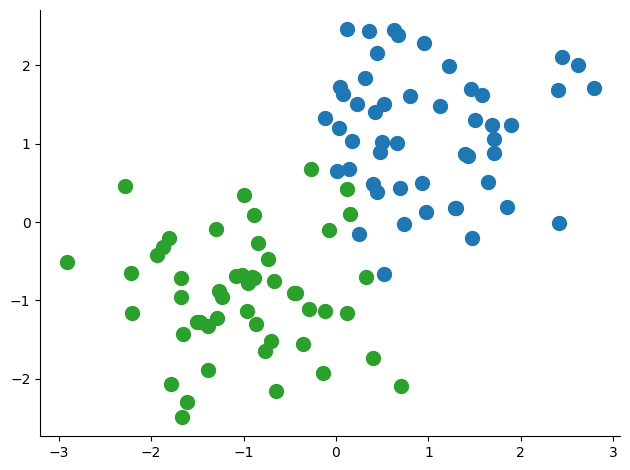

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=[[-1,-1],[1,1]], cluster_std=0.75,random_state=0)
colors = ['tab:green','tab:blue']
fig,ax = plt.subplots()

for k,classe in enumerate(np.unique(y)):
    ax.plot(X[y==classe,0],X[y==classe,1],'o',c=colors[k],markersize="10")

for spine in ['right','top']:
    ax.spines[spine].set_color("None")
#ax.set_axis_off()
plt.tight_layout()
plt.savefig("decision_tree_data.svg")

# MLP par défaut

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(max_iter=500)
clf.fit(X,y)
print(f"Performance en apprentissage : {accuracy_score(clf.predict(X), y)}")

Performance en apprentissage : 0.96


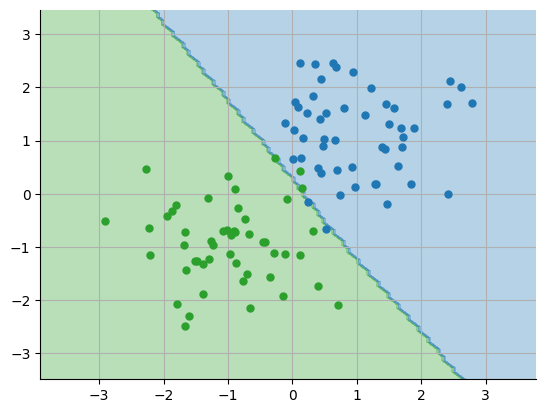

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib 
fig,ax = plt.subplots()

colors = ['tab:green','tab:blue']

DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        plot_method="contourf",
        ax=ax,
        alpha = .33,
        cmap=matplotlib.colors.ListedColormap(colors))

for k,classe in enumerate(np.unique(y)):
    ax.plot(X[y==classe,0],X[y==classe,1],'o',c=colors[k],markersize="5")

for spine in ['top','right']:
    ax.spines[spine].set_color("None")
ax.grid()


# MLP plus complexe

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

layers = [32,64,128,64,32]
clf = MLPClassifier(hidden_layer_sizes=layers,max_iter=500)
clf.fit(X,y)
ypred = clf.predict(X)
print(f"Performance en apprentissage : {accuracy_score(ypred, y)}")

Performance en apprentissage : 1.0


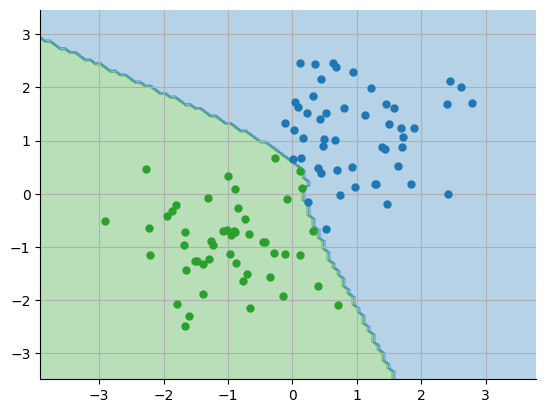

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib 
fig,ax = plt.subplots()

colors = ['tab:green','tab:blue']

DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        plot_method="contourf",
        ax=ax,
        alpha = .33,
        cmap=matplotlib.colors.ListedColormap(colors))

for k,classe in enumerate(np.unique(y)):
    ax.plot(X[y==classe,0],X[y==classe,1],'o',c=colors[k],markersize="5")

for spine in ['top','right']:
    ax.spines[spine].set_color("None")
ax.grid()
